In [1]:
from PIL import Image
from numpy import *
from pylab import *

In [2]:
import ncut
ncut = reload(ncut)
from scipy.misc import imresize

In [3]:
im = array(Image.open('C-uniform03.ppm'))
m, n = im.shape[:2]

In [4]:
wid = 50
rim = imresize(im, (wid, wid), interp='bilinear')
rim = array(rim, 'f')

In [5]:
A = ncut.ncut_graph_matrix(rim, sigma_d=1, sigma_g=1e-2)
code, V = ncut.cluster(A, k=3, ndim=3)
codeim = imresize(code.reshape(wid, wid), (m, n), interp='nearest')

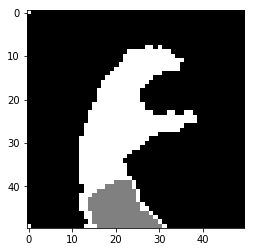

In [6]:
figure()
imshow(codeim)
gray()
show()

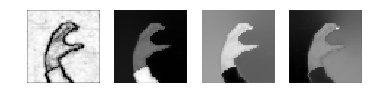

In [7]:
code, V = ncut.cluster(A, k=4, ndim=3)
figure()
for i in range(4):
    subplot(1, 4, i+1)
    imshow(imresize(V[i].reshape(wid, wid), (m, n), interp='bilinear'))
    axis('off')
show()

In [10]:
prime_img = V[0].reshape(wid, wid)

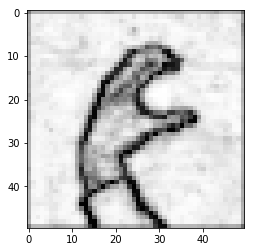

In [12]:
figure()
gray()
imshow(prime_img)
show()

In [13]:
from scipy.ndimage import filters

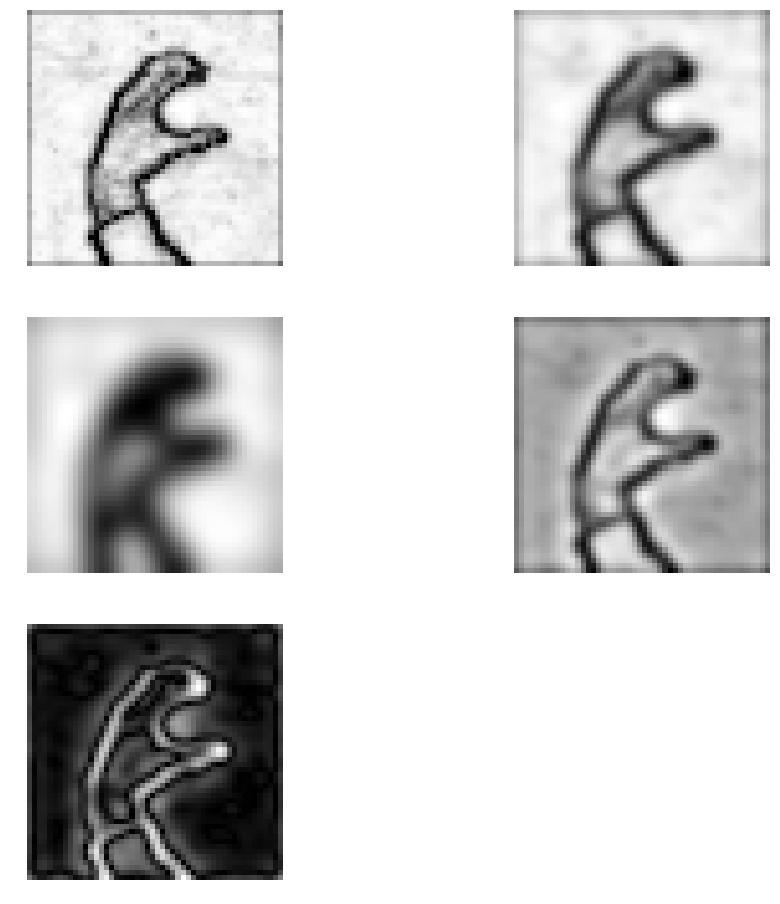

In [50]:
sigma1 = 1
sigma2 = 3
im2 = filters.gaussian_filter(prime_img, sigma1)
im3 = filters.gaussian_filter(prime_img, sigma2)
im4 = im2 - im3
im5 = sqrt(im4**2)

figure(figsize=(16, 16))
gray()
subplot(3, 2, 1)
imshow(prime_img)
axis('off')
subplot(3, 2, 2)
imshow(im2)
axis('off')
subplot(3, 2, 3)
imshow(im3)
axis('off')
subplot(3, 2, 4)
imshow(im4)
axis('off')
subplot(3, 2, 5)
imshow(im5)
axis('off')
show()

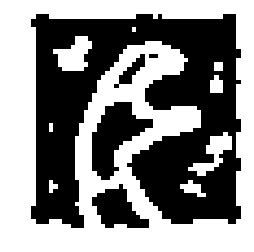

In [81]:
im6 = im4.copy()
threshold = 0
im6[im6<=threshold] = 0
im6[im6>threshold] = 1
im6 = 1 - im6
figure(0)
gray()
imshow(im6)
axis('off')
show()